In [4]:
import pandas as pd 

customers = pd.read_csv('data/Customers.csv')
products = pd.read_csv('data/Products.csv')
transactions = pd.read_csv('data/Transactions.csv')

data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')
data = data.rename(columns={'Price_x':"Price"}).drop('Price_y', axis=1)

# Customers

In [6]:
customers.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [5]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [7]:
customers.describe()

,CustomerID,CustomerName,Region,SignupDate
count,200,200,200,200
unique,200,200,4,179
top,C0001,Lawrence Carroll,South America,2022-04-16
freq,1,1,59,3


There are 4 unique `Region`s

In [42]:
customers['Region'].value_counts()

Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64

In [12]:
customers[customers.duplicated()]

,CustomerID,CustomerName,Region,SignupDate


In [16]:
customers.isnull().sum()

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

There are no missing values or duplicates in `Customers`

# Products

In [18]:
products.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [19]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB


In [20]:
products.describe()

,Price
count,100.000000
mean,267.551700
std,143.219383
min,16.080000
25%,147.767500
50%,292.875000
75%,397.090000
max,497.760000


In [43]:
products['Category'].value_counts()

Category
Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: count, dtype: int64

There are 4 unique `Category`s

In [22]:
products['Category'].unique()

array(['Books', 'Electronics', 'Home Decor', 'Clothing'], dtype=object)

In [23]:
products[products.duplicated()]

,ProductID,ProductName,Category,Price


In [24]:
products.isna().sum()

ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

There are no missing values or duplicates in `Products`.

# Transactions

In [25]:
transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [26]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


In [27]:
transactions.describe()

,Quantity,TotalValue,Price
count,1000.000000,1000.000000,1000.00000
mean,2.537000,689.995560,272.55407
std,1.117981,493.144478,140.73639
min,1.000000,16.080000,16.08000
25%,2.000000,295.295000,147.95000
50%,3.000000,588.880000,299.93000
75%,4.000000,1011.660000,404.40000
max,4.000000,1991.040000,497.76000


In [28]:
transactions[transactions.duplicated()]

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price


In [29]:
transactions.isna().sum()

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

There are no missing values or duplicates in `Transactions`.

# Merged Data

In [30]:
data.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,CustomerName,Region,SignupDate,ProductName,Category
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics


# Insights

In [32]:
# most common region
data['Region'].value_counts()

Region
South America    304
North America    244
Europe           234
Asia             218
Name: count, dtype: int64

In [33]:
# most common product
data['ProductName'].value_counts()

ProductName
ActiveWear Smartwatch          40
SoundWave Headphones           38
BookWorld Biography            30
SoundWave Cookbook             29
ActiveWear Rug                 29
                               ..
HomeSense Bluetooth Speaker     7
SoundWave Laptop                7
ComfortLiving Mystery Book      7
SoundWave Bluetooth Speaker     7
SoundWave Jacket                5
Name: count, Length: 66, dtype: int64

In [34]:
# most common category
data['Category'].value_counts()

Category
Books          270
Electronics    254
Home Decor     248
Clothing       228
Name: count, dtype: int64

In [39]:
# Common category by region
data.groupby('Region')['Category'].agg(lambda x: x.value_counts().idxmax())

Region
Asia               Clothing
Europe           Home Decor
North America         Books
South America         Books
Name: Category, dtype: object

In [41]:
# Region by categories
data.groupby('Category')['Region'].agg(lambda x: x.value_counts().idxmax())

# The most common region for all categories is south America, this could be since South America has the most transactions and most customers.

Category
Books          South America
Clothing       South America
Electronics    South America
Home Decor     South America
Name: Region, dtype: object

In [40]:
# common product by region
data.groupby('Region')['ProductName'].agg(lambda x: x.value_counts().idxmax())

Region
Asia                 HomeSense T-Shirt
Europe            SoundWave Headphones
North America     SoundWave Headphones
South America    ActiveWear Smartwatch
Name: ProductName, dtype: object

In [49]:
# Spending by region
data.groupby('Region')['TotalValue'].sum()

Region
Asia             152074.97
Europe           166254.63
North America    152313.40
South America    219352.56
Name: TotalValue, dtype: float64

In [54]:
# Spending by category
data.groupby('Category')['TotalValue'].sum()

Category
Books          192147.47
Clothing       166170.66
Electronics    180783.50
Home Decor     150893.93
Name: TotalValue, dtype: float64

In [67]:
# Spending by category and region
data.groupby(['Category', 'Region'])['TotalValue'].sum().reset_index().sort_values(by='TotalValue', ascending=False)

,Category,Region,TotalValue
3,Books,South America,69752.03
11,Electronics,South America,58846.32
4,Clothing,Asia,49353.09
15,Home Decor,South America,48310.72
1,Books,Europe,47464.42
10,Electronics,North America,44716.43
7,Clothing,South America,42443.49
2,Books,North America,41811.99
9,Electronics,Europe,41562.60
13,Home Decor,Europe,40892.02


In [59]:
# Regions with most-spending customers
data.groupby(['Region', 'CustomerID'])['TotalValue'].sum().groupby('Region').mean()

Region
Asia             3456.249318
Europe           3325.092600
North America    3311.160870
South America    3717.840000
Name: TotalValue, dtype: float64

In [66]:
# Top-spending customers
top_customers = data.groupby(['Region', 'CustomerID'])['TotalValue'].sum().reset_index()

top_customers.sort_values(by=['Region',  'TotalValue'], ascending=[False, False]).head(10)

,Region,CustomerID,TotalValue
156,South America,C0082,7572.91
194,South America,C0188,7111.32
163,South America,C0099,6715.72
186,South America,C0165,6708.10
159,South America,C0087,6604.23
165,South America,C0104,6579.10
164,South America,C0102,6132.36
162,South America,C0096,6072.92
146,South America,C0013,6000.56
185,South America,C0163,5775.28


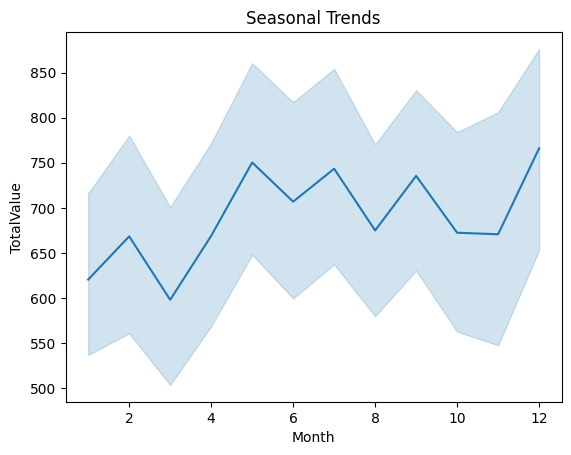

In [70]:
# Visualise monthly spending data
data['TransactionDate'] = pd.to_datetime(data['TransactionDate'])
data['Month'] = data['TransactionDate'].dt.month

sns.lineplot(data=data, x='Month', y='TotalValue')
plt.title('Seasonal Trends')
plt.show()


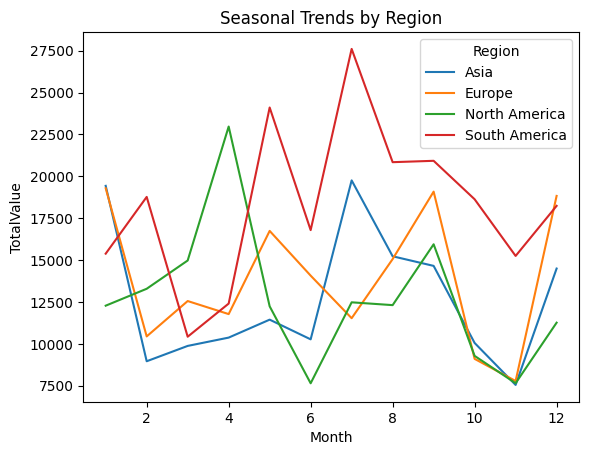

In [68]:
# Visualise monthly spending data by region

data['TransactionDate'] = pd.to_datetime(data['TransactionDate'])
data['Month'] = data['TransactionDate'].dt.month

seasonal_trends = data.groupby(['Region', 'Month'])['TotalValue'].sum().reset_index()

sns.lineplot(data=seasonal_trends, x='Month', y='TotalValue', hue='Region')
plt.title('Seasonal Trends by Region')
plt.show()
